https://www.kaggle.com/datasets/yasserh/song-popularity-dataset

In [1]:

# Generic Imports

import numpy as np
import os
import matplotlib as mpl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, RobustScaler,PowerTransformer, FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer, KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OrdinalEncoder
import sklearn.metrics as metrics
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split

In [2]:
#@title Get the Dataset
!wget https://www.dropbox.com/s/zzdn6jjd7v5rwv0/train.csv?dl=0
import io
df = pd.read_csv('train.csv?dl=0')


--2023-09-05 14:18:07--  https://www.dropbox.com/s/zzdn6jjd7v5rwv0/train.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.80.18, 2620:100:6035:18::a27d:5512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.80.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/zzdn6jjd7v5rwv0/train.csv [following]
--2023-09-05 14:18:08--  https://www.dropbox.com/s/raw/zzdn6jjd7v5rwv0/train.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc4e91c677af4cc10baed9c3d5f4.dl.dropboxusercontent.com/cd/0/inline/CDLnaQzuFxMfN8_oAzLBcr1dvEDnPuGLT13Qrqb_VPvSujpsA0M9FHbT1JjfrWRuksBzII0gnT44teyVXY0cUNPPsFKBTp0y_Y5GD3aWi-SG-mhmPgfQ8_HoEqiK0eGvDF8/file# [following]
--2023-09-05 14:18:10--  https://uc4e91c677af4cc10baed9c3d5f4.dl.dropboxusercontent.com/cd/0/inline/CDLnaQzuFxMfN8_oAzLBcr1dvEDnPuGLT13Qrqb_VPvSujpsA0M9FHbT1JjfrWRuksBzII0gnT44teyVXY0cUNPPsFKBTp0y_Y5GD3aWi-SG-mhmPgfQ8_HoEqiK

In [3]:
df.head(5)

,id,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,song_popularity
0,0,212990.0,0.642286,0.856520,0.707073,0.002001,10.0,NaN,-5.619088,0,0.082570,158.386236,4,0.734642,0
1,1,NaN,0.054866,0.733289,0.835545,0.000996,8.0,0.436428,-5.236965,1,0.127358,102.752988,3,0.711531,1
2,2,193213.0,NaN,0.188387,0.783524,-0.002694,5.0,0.170499,-4.951759,0,0.052282,178.685791,3,0.425536,0
3,3,249893.0,0.488660,0.585234,0.552685,0.000608,0.0,0.094805,-7.893694,0,0.035618,128.715630,3,0.453597,0
4,4,165969.0,0.493017,NaN,0.740982,0.002033,10.0,0.094891,-2.684095,0,0.050746,121.928157,4,0.741311,0


In [4]:
df.describe()

,id,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,song_popularity
count,30000.000000,26933.000000,26976.000000,27033.000000,27065.000000,27034.000000,26926.000000,26978.000000,27023.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000
mean,14999.500000,193309.698660,0.277219,0.571056,0.683746,0.036184,5.044752,0.198926,-7.418965,0.321167,0.093773,116.557754,3.393967,0.581015,0.36440
std,8660.398374,45713.675116,0.298704,0.189676,0.213314,0.149116,3.379665,0.151879,3.892481,0.466932,0.083474,26.188606,0.525198,0.237429,0.48127
min,0.000000,25658.000000,-0.013551,0.043961,-0.001682,-0.004398,0.000000,0.027843,-30.170399,0.000000,0.015065,63.478876,2.000000,0.013398,0.00000
25%,7499.750000,166492.000000,0.039530,0.425141,0.538968,0.000952,2.000000,0.111956,-9.586576,0.000000,0.038421,97.000171,3.000000,0.398907,0.00000
50%,14999.500000,186908.000000,0.140486,0.607879,0.705028,0.001967,6.000000,0.136253,-6.356886,0.000000,0.055611,113.795116,3.000000,0.599059,0.00000
75%,22499.250000,215039.000000,0.484065,0.718443,0.870518,0.003226,8.000000,0.213505,-4.618818,1.000000,0.117877,128.497863,4.000000,0.760160,1.00000
max,29999.000000,470577.000000,1.065284,0.957131,1.033434,1.075415,11.000000,1.065298,-0.877346,1.000000,0.560748,218.637439,5.000000,1.022283,1.00000


# **Train- Test Split**
**Taking a copy of the dataset before the train and test split. The train and test are spilt with ratio 4:1 and are saved in two different dataset. We will consider the training dataset (with all the features and the target column) for EDA purpose and forget about the test data set :)**

In [5]:
df1 = df.copy()
df_train, df_test = train_test_split(df1,test_size=0.2,random_state=42)
df_train.info()

dftrain = df_train.copy()
dftest = df_test.copy()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24000 entries, 21753 to 23654
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                24000 non-null  int64  
 1   song_duration_ms  21525 non-null  float64
 2   acousticness      21576 non-null  float64
 3   danceability      21631 non-null  float64
 4   energy            21647 non-null  float64
 5   instrumentalness  21611 non-null  float64
 6   key               21535 non-null  float64
 7   liveness          21575 non-null  float64
 8   loudness          21622 non-null  float64
 9   audio_mode        24000 non-null  int64  
 10  speechiness       24000 non-null  float64
 11  tempo             24000 non-null  float64
 12  time_signature    24000 non-null  int64  
 13  audio_valence     24000 non-null  float64
 14  song_popularity   24000 non-null  int64  
dtypes: float64(11), int64(4)
memory usage: 2.9 MB


# **Observation**
 We have null values in many feature columns of the train dataset

# **Get to know the data distribution of all the columns**

array([[<Axes: title={'center': 'song_duration_ms'}>,
        <Axes: title={'center': 'acousticness'}>,
        <Axes: title={'center': 'danceability'}>,
        <Axes: title={'center': 'energy'}>],
       [<Axes: title={'center': 'instrumentalness'}>,
        <Axes: title={'center': 'key'}>,
        <Axes: title={'center': 'liveness'}>,
        <Axes: title={'center': 'loudness'}>],
       [<Axes: title={'center': 'audio_mode'}>,
        <Axes: title={'center': 'speechiness'}>,
        <Axes: title={'center': 'tempo'}>,
        <Axes: title={'center': 'time_signature'}>],
       [<Axes: title={'center': 'audio_valence'}>,
        <Axes: title={'center': 'song_popularity'}>, <Axes: >, <Axes: >]],
      dtype=object)

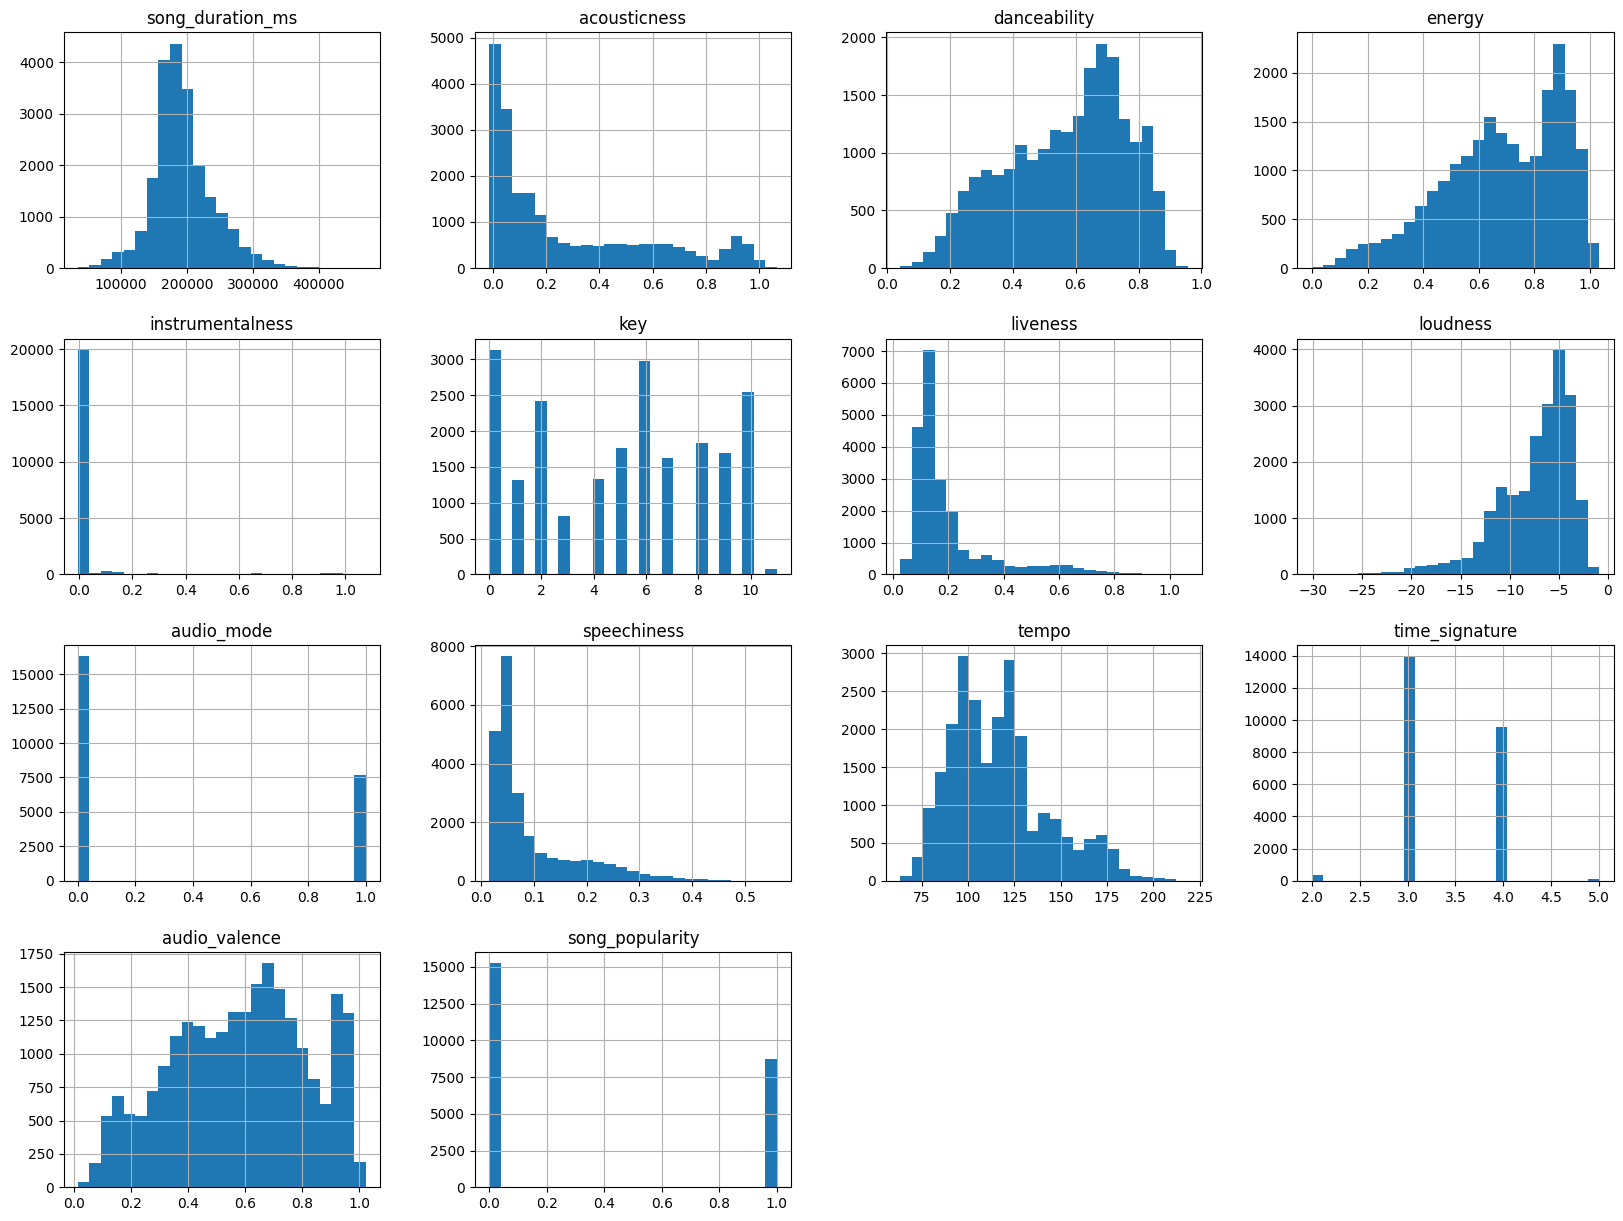

In [6]:
df_train = df_train.drop("id", axis=1)
df_train.hist(bins=25,figsize=(20,15))

# **Observation**
acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,audio_valence : values are between 0 and 1
audio_mode,time_signature,key: categorical feature columns



# **Null values of the feature columns**

In [7]:
print(df_train.isna().sum().sort_values(ascending = False))

song_duration_ms    2475
key                 2465
liveness            2425
acousticness        2424
instrumentalness    2389
loudness            2378
danceability        2369
energy              2353
audio_mode             0
speechiness            0
tempo                  0
time_signature         0
audio_valence          0
song_popularity        0
dtype: int64


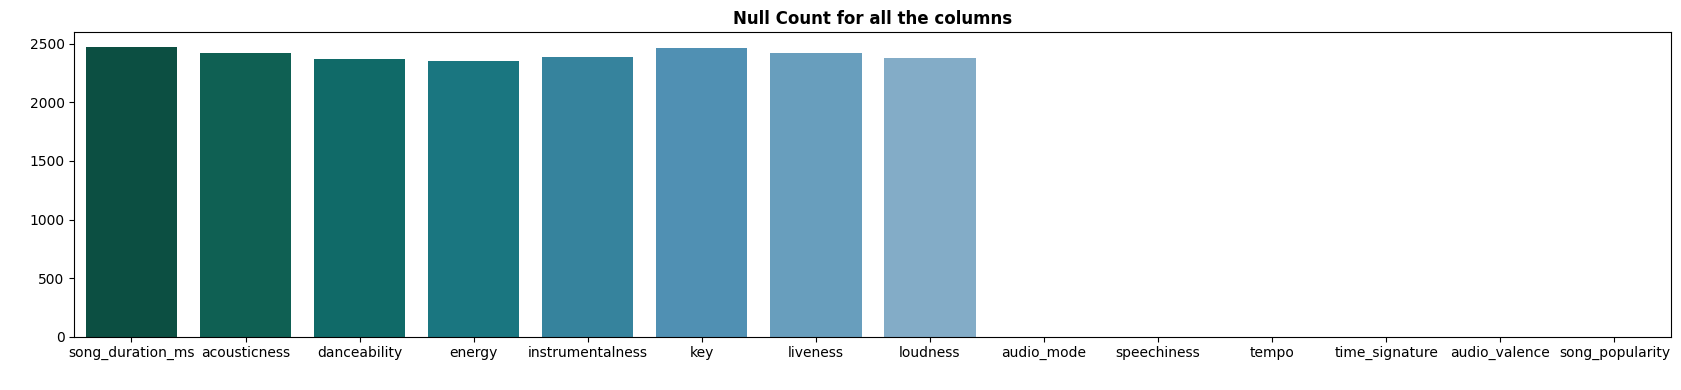

In [8]:
#plot the null value count graph
plt.figure(figsize = (17,4))
train_null = pd.DataFrame(df_train.isna().sum())
sns.barplot( x =train_null.index ,  y  = train_null[0],palette = "PuBuGn_r")
plt.title('Null Count for all the columns',weight = 'bold', color = 'black')
plt.ylabel(" ")
plt.xlabel(" ")
plt.tight_layout()

# **Observation**
key has the maximum missing values
key, song_duration_ms, acousticness , liveness , loudness, danceability, instrumentalness, energy: these features have almost equal amount of null values

# **Let's get to know the target column**

In [9]:
df_train.value_counts('song_popularity')

song_popularity
0    15273
1     8727
dtype: int64

In [10]:
count = pd.DataFrame(df_train['song_popularity'].value_counts()).reset_index()
count.columns = ['song_popularity', 'count']
print("Percentage of song_popularity = 0 : {:.2f} %".format(count["count"][0] *100 / df_train.shape[0]))
print("Percentage of song_popularity = 1 : {:.2f} %".format(count["count"][1]* 100 / df_train.shape[0]))

Percentage of song_popularity = 0 : 63.64 %
Percentage of song_popularity = 1 : 36.36 %


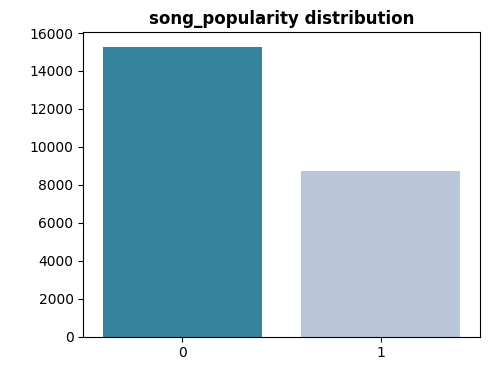

In [11]:
#plot the graph of the count in song_popularity
plt.figure(figsize = (5,4))

sns.countplot(data = df_train , x = df_train['song_popularity'], palette = 'PuBuGn_r' )
plt.title('song_popularity distribution',weight = 'bold', color = 'black')
plt.ylabel(" ")
plt.xlabel(" ")
plt.tight_layout()

# **Observation**
 The data entries for song popularity as 1 is comparatively less to that of 0. But the difference is not that significant.

# **Numerical feature column**

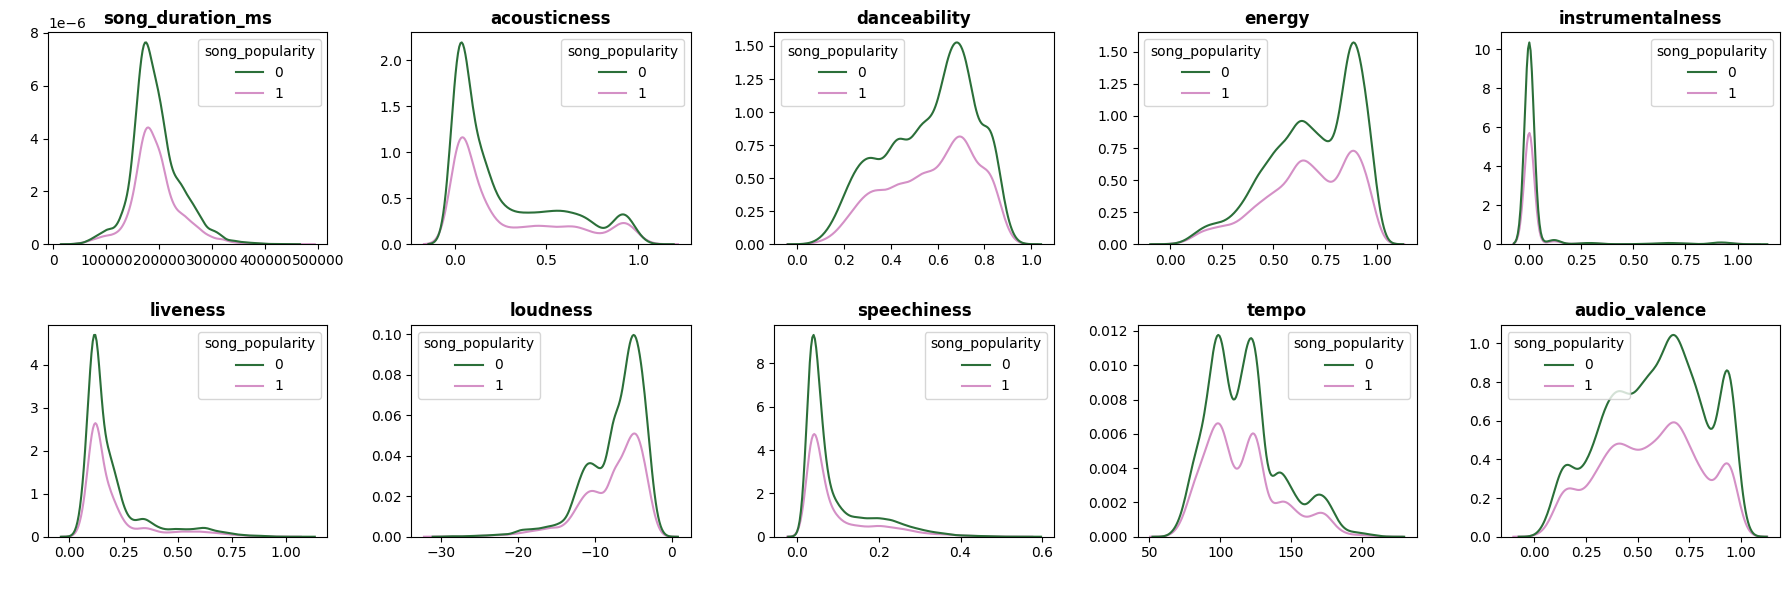

In [12]:
plt.figure(figsize = (18,6))

for i,col in enumerate(['song_duration_ms','acousticness','danceability','energy','instrumentalness','liveness','loudness','speechiness','tempo','audio_valence']):

  plt.subplot(2,5,i+1)
  sns.kdeplot(data = df_train , x = col, palette = 'cubehelix', hue = 'song_popularity' )
  plt.title(col,weight = 'bold', color = 'black')
  plt.ylabel(" ")
  plt.xlabel(" ")
  plt.tight_layout()

**Looks like the song popularity 0 and 1 has similar desity distribution over all the numerical feature columns. **

In [13]:
# find the skewness
df_train.skew().sort_values(ascending=False)

instrumentalness    5.053167
liveness            2.150374
speechiness         1.733082
acousticness        1.002076
audio_mode          0.765234
tempo               0.763426
song_duration_ms    0.610034
song_popularity     0.567033
time_signature      0.234007
key                -0.071751
audio_valence      -0.182894
danceability       -0.394074
energy             -0.584910
loudness           -1.420744
dtype: float64

**Handle the skewness and make it normal graphs. First we have to handle the null values before any other feature transformation**

In [14]:

col = df_train[['song_duration_ms','acousticness','danceability','energy','instrumentalness','liveness','loudness']]
ii_impute  = IterativeImputer(random_state =42 )
df_train1 = ii_impute.fit_transform(col)
df_train[['song_duration_ms_new','acousticness_new','danceability_new','energy_new','instrumentalness_new','liveness_new','loudness_new']] = df_train1
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24000 entries, 21753 to 23654
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   song_duration_ms      21525 non-null  float64
 1   acousticness          21576 non-null  float64
 2   danceability          21631 non-null  float64
 3   energy                21647 non-null  float64
 4   instrumentalness      21611 non-null  float64
 5   key                   21535 non-null  float64
 6   liveness              21575 non-null  float64
 7   loudness              21622 non-null  float64
 8   audio_mode            24000 non-null  int64  
 9   speechiness           24000 non-null  float64
 10  tempo                 24000 non-null  float64
 11  time_signature        24000 non-null  int64  
 12  audio_valence         24000 non-null  float64
 13  song_popularity       24000 non-null  int64  
 14  song_duration_ms_new  24000 non-null  float64
 15  acousticness_ne

In [15]:
from sklearn.utils.validation import column_or_1d
import math
df_train['danceability11'] = df_train['danceability'].apply(lambda x:np.log(x/(1-x)))


#scaler = MinMaxScaler()
#scaler.fit(data)
#'song_duration_ms','acousticness','danceability','energy','instrumentalness','liveness','loudness','speechiness','tempo','audio_valence'
col1 = df_train[['song_duration_ms_new','acousticness_new','danceability_new','energy_new','instrumentalness_new','liveness_new','loudness_new','speechiness','tempo','audio_valence']]
#scaler  = MinMaxScaler()
#df_train11 = scaler.fit_transform(col1)
#df_train[['song_duration_ms_11','acousticness_new11','danceability_new11','energy_new11','instrumentalness_new11','liveness_new11','loudness_new11','speechiness11','tempo11','audio_valence11']] = df_train11
#df_train.info()

scaler  = MinMaxScaler(feature_range = (0.0000001,1))
df_train11= scaler.fit_transform(col1)

# acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,audio_valence :

df_train['song_duration_ms_11'] = df_train['song_duration_ms_new'].apply(lambda x:np.log(x/(1-x)))
df_train['acousticness_new11'] = df_train['acousticness_new'].apply(lambda x:np.log(x/(1-x)))
df_train['danceability_new11'] = df_train['danceability_new'].apply(lambda x:np.log(x/(1-x)))
df_train['energy_new11'] = df_train['energy_new'].apply(lambda x:np.log(x/(1-x)))
df_train['instrumentalness_new11'] = df_train['instrumentalness_new'].apply(lambda x:np.log(x/(1-x)))
df_train['liveness_new11'] = df_train['liveness_new'].apply(lambda x:np.log(x/(1-x)))
df_train['loudness_new11'] = df_train['loudness_new'].apply(lambda x:np.log(x/(1-x)))
df_train['speechiness11'] = df_train['speechiness'].apply(lambda x:np.log(x/(1-x)))
df_train['tempo11'] = df_train['tempo'].apply(lambda x:np.log(x/(1-x)))
df_train['audio_valence11'] = df_train['audio_valence'].apply(lambda x:np.log(x/(1-x)))


In [16]:
col1 = df_train[['song_duration_ms_new','acousticness_new','danceability_new','energy_new','instrumentalness_new','liveness_new','loudness_new','speechiness','tempo','audio_valence']]
scaler  = MinMaxScaler(feature_range = (0.0000001,1))
df_train11 = scaler.fit_transform(col1)

df_train['speechiness11'] = df_train['speechiness'].apply(lambda x:np.log(x/(1-x)))
df_train['danceability_new11'] = df_train['danceability_new'].apply(lambda x:np.log(x/(1-x)))
df_train['liveness_new11'] = df_train['liveness_new'].apply(lambda x:np.log(x/(1-x)))
df_train['instrumentalness_new11'] = df_train['instrumentalness_new'].apply(lambda x:np.log(x/(1-x)))
df_train['audio_valence11'] = df_train['audio_valence'].apply(lambda x:np.log(x/(1-x)))


## **Handle Skewness / Feature Engineering**

**instrumentalness**

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


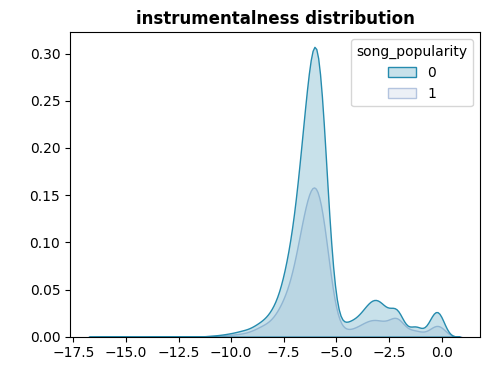

In [17]:

df_train['instrumentalness_new1'] = np.log(df_train['instrumentalness_new'])
#df_train['instrumentalness_new1'] = np.exp(df_train['instrumentalness_new'])
#df_train['instrumentalness_new1'] = np.power((df_train['instrumentalness_new']),0.1)


plt.figure(figsize = (5,4))
sns.kdeplot(data = df_train , x = df_train['instrumentalness_new1'], palette = 'PuBuGn_r', hue = 'song_popularity', fill= 'blue' )
plt.title('instrumentalness distribution',weight = 'bold', color = 'black')
plt.ylabel(" ")
plt.xlabel(" ")
plt.tight_layout()

**liveness**

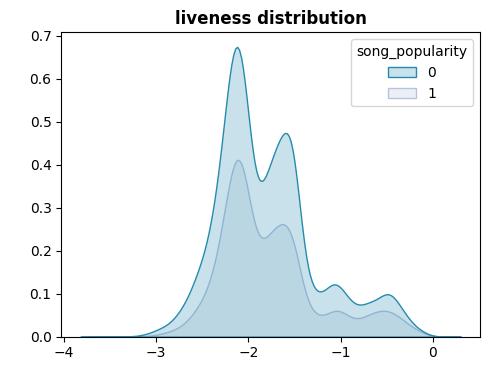

In [18]:
df_train['liveness_new1'] = np.log(df_train['liveness_new'])
#df_train['instrumentalness_new1'] = np.exp(df_train['instrumentalness_new'])
#df_train['instrumentalness_new1'] = np.power((df_train['instrumentalness_new']),0.1)


plt.figure(figsize = (5,4))
sns.kdeplot(data = df_train , x = df_train['liveness_new1'], palette = 'PuBuGn_r', hue = 'song_popularity', fill= 'blue' )
plt.title('liveness distribution',weight = 'bold', color = 'black')
plt.ylabel(" ")
plt.xlabel(" ")
plt.tight_layout()

**speechiness**

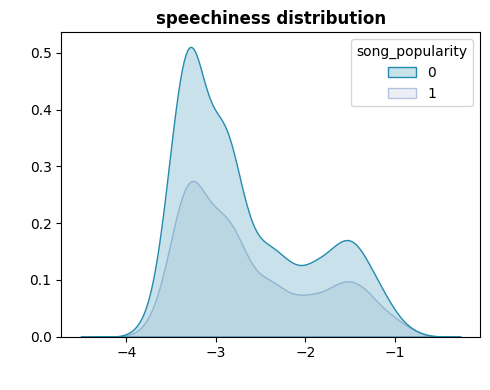

In [19]:
df_train['speechiness1'] = np.log(df_train['speechiness'])
#df_train['instrumentalness_new1'] = np.exp(df_train['instrumentalness_new'])
#df_train['speechiness1'] = np.power((df_train['speechiness']),0.03)


plt.figure(figsize = (5,4))
sns.kdeplot(data = df_train , x = df_train['speechiness1'], palette = 'PuBuGn_r', hue = 'song_popularity', fill= 'blue' )
plt.title('speechiness distribution',weight = 'bold', color = 'black')
plt.ylabel(" ")
plt.xlabel(" ")
plt.tight_layout()

**loudness**

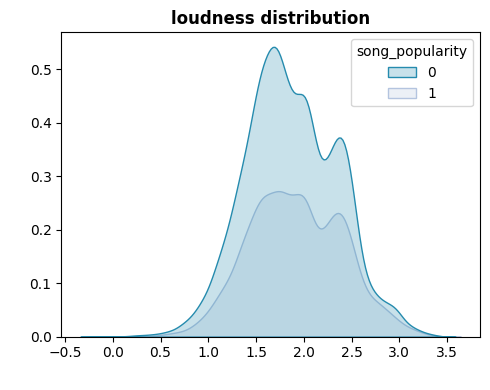

In [20]:

df_train['loudness_new1'] = np.log(abs(df_train['loudness_new']))
#df_train['instrumentalness_new1'] = np.exp(df_train['instrumentalness_new'])
#df_train['speechiness1'] = np.power((df_train['speechiness']),0.03)


plt.figure(figsize = (5,4))
sns.kdeplot(data = df_train , x = df_train['loudness_new1'], palette = 'PuBuGn_r', hue = 'song_popularity', fill= 'blue' )
plt.title('loudness distribution',weight = 'bold', color = 'black')
plt.ylabel(" ")
plt.xlabel(" ")
plt.tight_layout()

**acousticness**

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


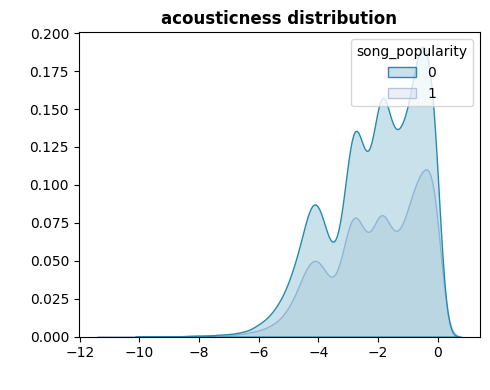

In [21]:

df_train['acousticness_new1'] = np.log(df_train['acousticness_new'])
#df_train['acousticness_new1'] = np.exp(df_train['acousticness_new'])
#df_train['acousticness_new1'] = np.power((df_train['acousticness_new']),2)


plt.figure(figsize = (5,4))
sns.kdeplot(data = df_train , x = df_train['acousticness_new1'], palette = 'PuBuGn_r', hue = 'song_popularity', fill= 'blue' )
plt.title('acousticness distribution',weight = 'bold', color = 'black')
plt.ylabel(" ")
plt.xlabel(" ")
plt.tight_layout()

In [ ]:
#Feature engineering
#df_train['valence'] = df_train['audio_valence'].apply(lambda x:0 if x<0.5 else 1)
#df_train['song_duration'] = df_train['song_duration_ms'].apply(lambda x:x/100000)

# **Observation**
We will consider the transformed instrumentalness, liveness,speechiness,loudness as they are considerably less skewed. Let us not consider the transformed acousticness feature column as it is still skewed.

Will consider the tranformed valence column for the model if the correlation is more than the original column.

Song duration is spread across a certain range of duration and transformed into minutes. Will consider the new transformed duration column if it has more correlation considering the original column.

# **Categorical feature columns**

**Handle the null values in key feature column and then transform the categorical column data type as category**

In [22]:
col = df_train[['key']]
knn_impute  = KNNImputer()
df_train1 = knn_impute.fit_transform(col)
df_train[['key_new']] = df_train1
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24000 entries, 21753 to 23654
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   song_duration_ms        21525 non-null  float64
 1   acousticness            21576 non-null  float64
 2   danceability            21631 non-null  float64
 3   energy                  21647 non-null  float64
 4   instrumentalness        21611 non-null  float64
 5   key                     21535 non-null  float64
 6   liveness                21575 non-null  float64
 7   loudness                21622 non-null  float64
 8   audio_mode              24000 non-null  int64  
 9   speechiness             24000 non-null  float64
 10  tempo                   24000 non-null  float64
 11  time_signature          24000 non-null  int64  
 12  audio_valence           24000 non-null  float64
 13  song_popularity         24000 non-null  int64  
 14  song_duration_ms_new    24000 non-

In [23]:
#categorical_col = ['audio_mode','time_signature','key']
df_train['audio_mode'] = df_train['audio_mode'].astype('category')
df_train['time_signature'] = df_train['time_signature'].astype('category')
df_train['key_new'] = df_train['key_new'].astype('category')


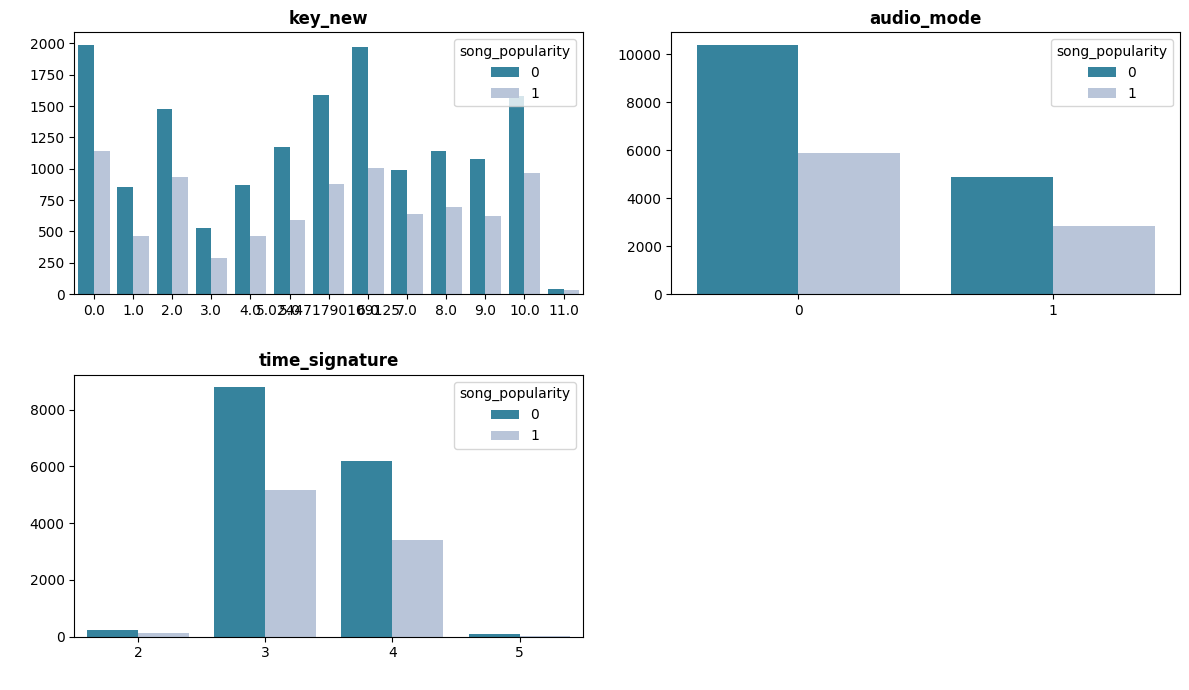

In [24]:
plt.figure(figsize = (12,7))
for i,col in enumerate(['key_new', 'audio_mode', 'time_signature']):
    plt.subplot(2,2,i+1)
    sns.countplot(data = df_train , x = col, palette = 'PuBuGn_r', hue = 'song_popularity' )
    plt.title(col,weight = 'bold', color = 'black')
    plt.ylabel(" ")
    plt.xlabel(" ")
    plt.tight_layout()

**Reducing the entries for song popularity = 0 and making the count nearly same a s song popularity =1 and plotting the above graph**

# **Observation**
The song popularity (1 and 0)are propertionally divided between the different values in the audio_mode categorical feature and shows little difference in distribution in time_signature and key categorical features.

# **Feature column and Outliers**

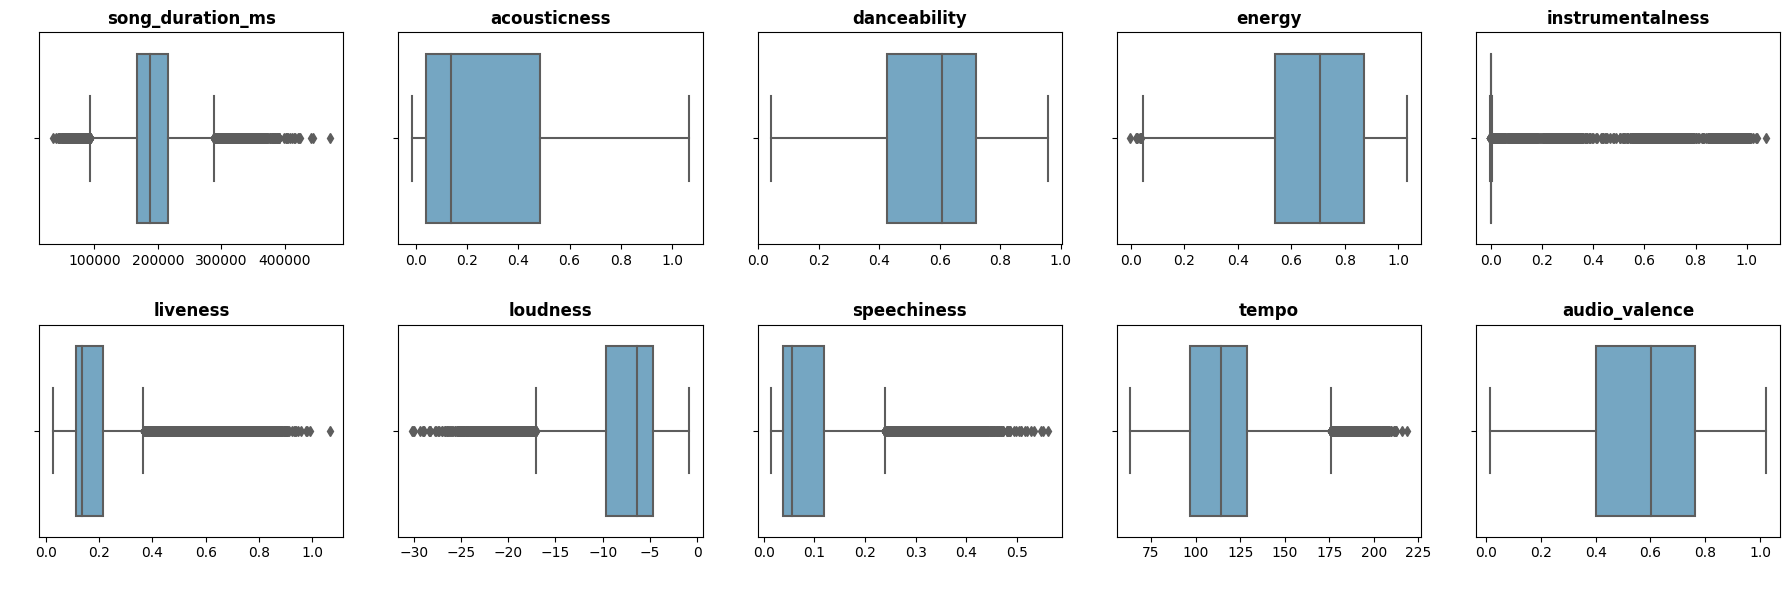

In [25]:
#check for outliers
#how to deal with outliers
plt.figure(figsize = (18,6))

for i,col in enumerate(['song_duration_ms','acousticness','danceability','energy','instrumentalness','liveness','loudness','speechiness','tempo','audio_valence']):

  plt.subplot(2,5,i+1)
  sns.boxplot(data = df_train , x = col, palette = 'PuBuGn_r', hue = 'song_popularity' )
  plt.title(col,weight = 'bold', color = 'black')
  plt.ylabel(" ")
  plt.xlabel(" ")
  plt.tight_layout()

# **All feature column correlation**

In [26]:
df_train['instrumentalness_new_lambda']= df_train['instrumentalness_new'].apply(lambda x:0 if x<0.5 else 1)

#df_train['speech']= df_train['speechiness'].apply(lambda x:0 if x<0.5 else 1)
#df_train['dance']= df_train['danceability_new'].apply(lambda x:0 if x<0.4 else 1)
#df_train['ener']= df_train['energy_new'].apply(lambda x:0 if x<0.4 else 1)
#df_train['temp']= df_train['tempo'].apply(lambda x:0 if x<150 else 1)

#df_train['loud']= df_train['loudness_new'].apply(lambda x:0 if x<-15 else 1)
#df_train['live']= df_train['liveness_new'].apply(lambda x:0 if x<0.25 else 1)


import math


#df_train['inst1']= df_train['instrumentalness_new'].apply(lambda x:1 / (1 + math.exp(-x)))



<ipython-input-27-c8a4b9352974>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = df_train.corr()


<Axes: >

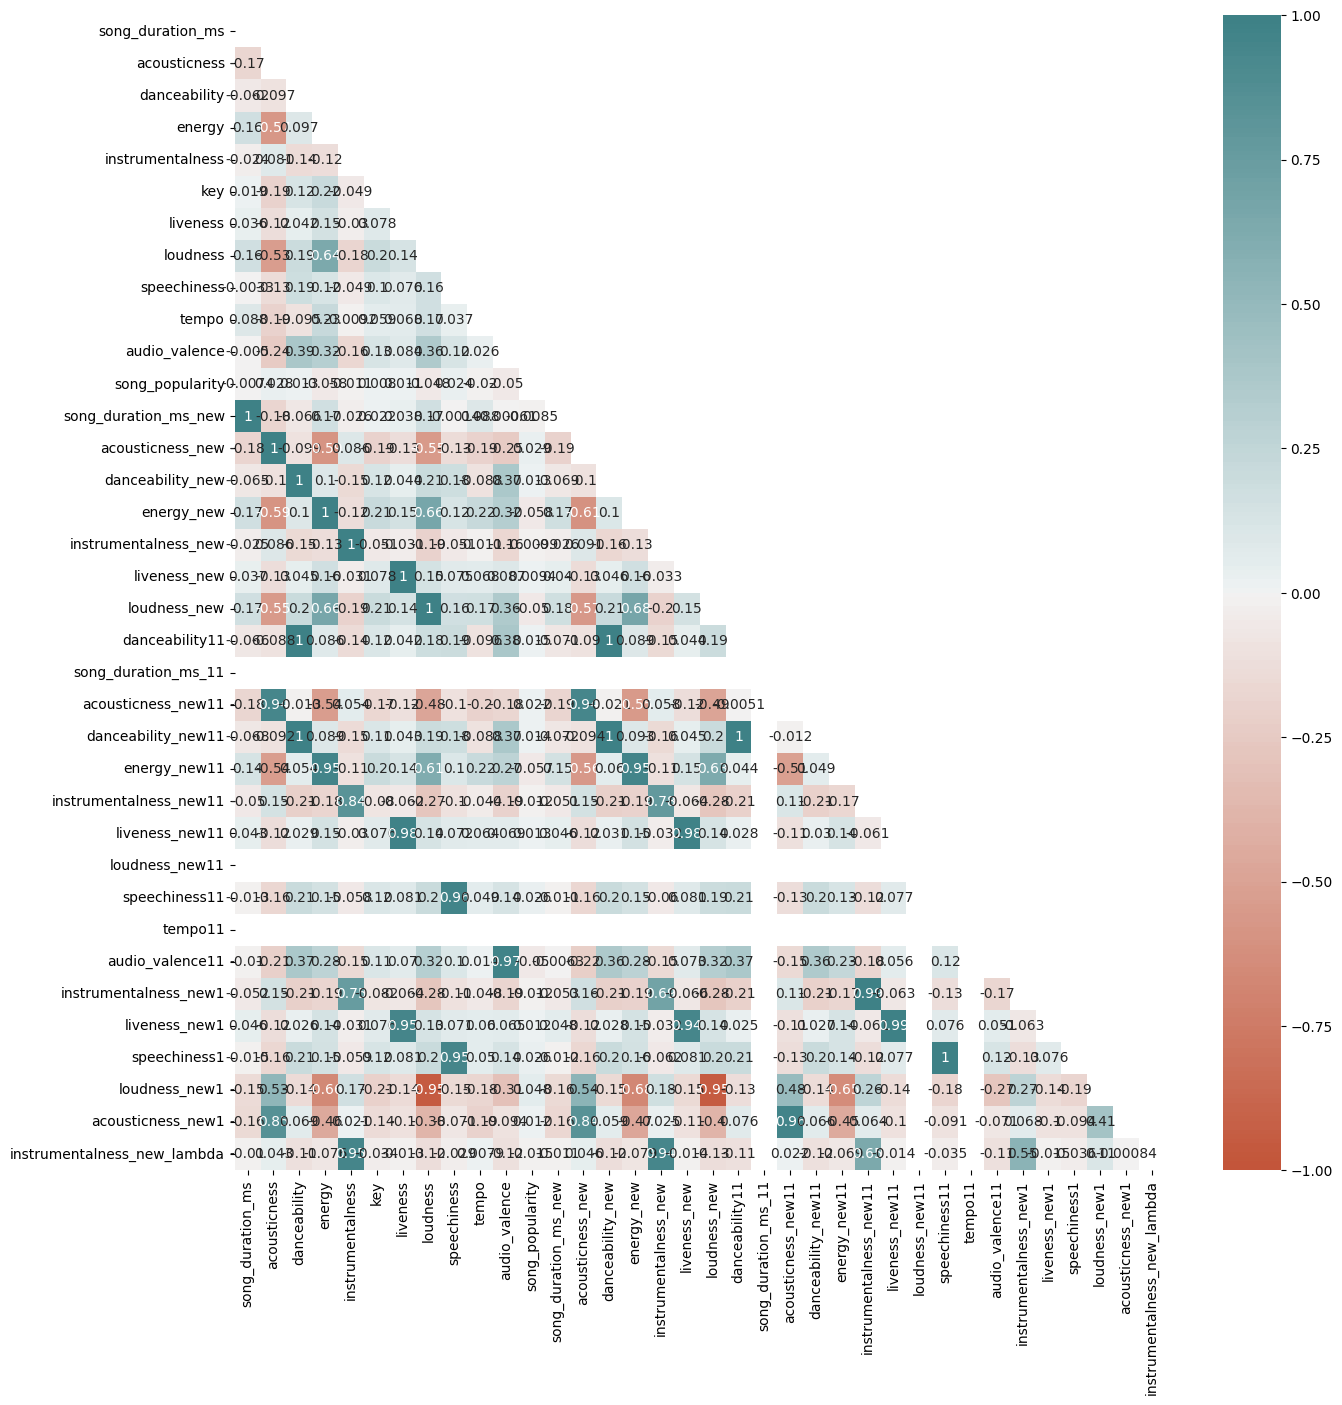

In [27]:
corr_mat = df_train.corr()

plt.figure(figsize=(15,15))
mask = np.zeros_like(corr_mat)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_mat, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 200, n=200), annot = True, mask = mask)



Energy --> loudness, time_signature, tempo, key, audio_valence
acousticness --> loudness, energy
audio_valence -->danceability, energy, loudness

In [28]:

corr_mat["song_popularity"].sort_values(ascending=False)

song_popularity                1.000000
loudness_new1                  0.048371
acousticness_new               0.029394
acousticness                   0.028483
speechiness1                   0.026125
speechiness11                  0.026053
speechiness                    0.023530
acousticness_new11             0.021660
danceability11                 0.014905
danceability_new11             0.014064
danceability                   0.013420
danceability_new               0.012803
liveness_new11                 0.012557
liveness_new1                  0.012144
acousticness_new1              0.011851
liveness                       0.011038
liveness_new                   0.009439
key                            0.008003
song_duration_ms              -0.007381
song_duration_ms_new          -0.008482
instrumentalness_new          -0.009949
instrumentalness              -0.010952
instrumentalness_new1         -0.011851
instrumentalness_new11        -0.011890
instrumentalness_new_lambda   -0.015012


In [ ]:
#plot the scatter plots with the most correlated graphs
#pair plots between cat features and numerical columns

In [ ]:
#correlation graphs after different imputation

In [30]:
x_train = df_train.drop('song_popularity',axis=1)
y_train = df_train['song_popularity'].copy()

#y_test = df['song_popularity'].copy()
#x_test = df_test.drop('song_popularity',axis=1)

In [34]:
df1 = df.copy()
df_train1, df_test = train_test_split(df1,test_size=0.2,random_state=42)

df_train, df_val = train_test_split(df_train1,test_size=0.2,random_state=42)
df_train.info()
df_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19200 entries, 9922 to 16371
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                19200 non-null  int64  
 1   song_duration_ms  17210 non-null  float64
 2   acousticness      17241 non-null  float64
 3   danceability      17288 non-null  float64
 4   energy            17326 non-null  float64
 5   instrumentalness  17310 non-null  float64
 6   key               17251 non-null  float64
 7   liveness          17218 non-null  float64
 8   loudness          17337 non-null  float64
 9   audio_mode        19200 non-null  int64  
 10  speechiness       19200 non-null  float64
 11  tempo             19200 non-null  float64
 12  time_signature    19200 non-null  int64  
 13  audio_valence     19200 non-null  float64
 14  song_popularity   19200 non-null  int64  
dtypes: float64(11), int64(4)
memory usage: 2.3 MB
<class 'pandas.core.frame.DataFrame'>
